In [1]:
import pandas as pd
import glob
import os
import re
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


In [2]:
def metric(path, r_string, type_string, timing=False):
    all_files = glob.glob(os.path.join(path, "*"+r_string+type_string+"*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
      
    print(type(all_files))
    results = dict()
    results[type_string] = dict()
    results['reg'] = dict()
    results['time_'+type_string] = dict()
    results['time_reg'] = dict()
    results['CPD_'+type_string] = dict()
    results['CPD_REG'] = dict()
    gnn_results = dict()
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
    
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        gnn_results[name] = int(max(df['Iteration']))
        # print(df[].head())
    results[type_string] = gnn_results
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = sum(df['Time'])
    results['time_'+type_string] = reg_results
    # print(results)
    reg_results = dict()

    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_'+type_string] = reg_results
    # print(results)
    reg_results = dict()
    all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['Iteration'])
        # print(df[].head())  
    results['reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = sum(df['Time'])
    results['time_reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_REG'] = reg_results
        # print(df[].head())

    # print(results)
    my_df = pd.DataFrame.from_dict(results)
    # print(my_df)
    my_df['Reduction'] = (my_df['reg'].values - my_df[type_string].values)/my_df['reg'].values
    # my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

    # print("{:2%}".format(my_df))
    my_df.dropna(inplace=True)
    print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))

    pd.set_option('expand_frame_repr', False)
    my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
    my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
    my_df['time_'+type_string]=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_'+type_string]], index = my_df.index)
    my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
    my_df['CPD_'+type_string]=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_'+type_string]], index = my_df.index)
   
    print(my_df)

In [3]:
def prediction_hist():
    path = "/benchmarks/graph_data/"

    results = []
    graph_files = glob.glob(os.path.join(path, "*-hcost.csv"))
    for graph in graph_files:
        df = pd.read_csv(graph, header=0)
        results.extend(df.values)
    # df = pd.read_csv(graph_files[0],index_col=None,header=0)
    # results = list(filter(lambda x: x > 2, results))
    plt.yscale('log')
    plt.hist(results, 6, color="purple")

/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


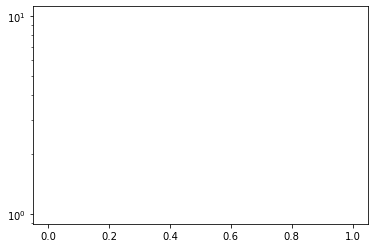

In [4]:
prediction_hist()

In [12]:
path = "/benchmarks/route_metrics/MCNC/"
r_string = "EArch*"
type_string = "init"
metric(path, r_string, type_string)

<class 'list'>
Average:  -9.27%
                 init  reg time_init time_reg CPD_init CPD_REG Reduction
EArch__alu4        22   18      5.34     0.43     8.42    5.24   -22.22%
EArch__apex2       19   16     13.45     0.60     8.75    6.22   -18.75%
EArch__apex4       22   21     19.90     0.55     9.59    5.50    -4.76%
EArch__bigkey      18   15      0.75     0.40     3.78    3.11   -20.00%
EArch__clma        19   16    122.95     2.45    13.39   11.06   -18.75%
EArch__des         17   15      6.24     0.54     7.66    5.83   -13.33%
EArch__diffeq      15   15      1.79     0.31     7.82    6.56     0.00%
EArch__dsip        15   17      1.82     0.41     3.88    2.77    11.76%
EArch__elliptic    19   17     37.26     1.00    10.13    9.33   -11.76%
EArch__ex1010      19   17     34.34     1.44    10.08    7.57   -11.76%
EArch__ex5p        19   19      9.31     0.40     8.52    5.30     0.00%
EArch__frisc       15   14     16.74     0.92    12.64   12.50    -7.14%
EArch__misex3      

In [13]:
path = "/benchmarks/route_metrics/TITAN/"
r_string = "strat*"
type_string = "init"
metric(path, r_string, type_string)

<class 'list'>
Average:  -6.34%
                          init  reg time_init time_reg CPD_init CPD_REG Reduction
stratixiv_arch__alu4      16.0   16      1.86     0.76    10.78    9.53     0.00%
stratixiv_arch__apex2     24.0   18      7.46     1.19    13.32   10.37   -33.33%
stratixiv_arch__apex4     20.0   18      7.61     1.04    11.78    9.49   -11.11%
stratixiv_arch__bigkey     8.0    9      0.49     4.52     7.78    7.78    11.11%
stratixiv_arch__clma      19.0   17     44.68     4.36    10.92    9.93   -11.76%
stratixiv_arch__des       12.0   12      2.28     8.16    12.33   12.43     0.00%
stratixiv_arch__diffeq    15.0   17      5.60     1.10     9.89    7.51    11.76%
stratixiv_arch__dsip      11.0   14      4.42     7.03     7.43    7.43    21.43%
stratixiv_arch__elliptic  22.0   22    443.52     6.53    18.28   10.11     0.00%
stratixiv_arch__ex1010    25.0   22     45.99     4.32    17.90   12.69   -13.64%
stratixiv_arch__ex5p      22.0   17      9.72     1.07    12.42   

In [7]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*EArch*"
type_string = "gnd"
metric(path, r_string, type_string)

<class 'list'>


StatisticsError: mean requires at least one data point

In [ ]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "strat*timing*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  69.63%
                                                     gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__carpat_stratixiv_arch_timing         6.0   22    29.57   134.06    8.23    8.15    72.73%
stratixiv_arch__CHERI_stratixiv_arch_timing         28.0   44   260.57   499.08   17.37   18.35    36.36%
stratixiv_arch__CH_DFSIN_stratixiv_arch_timing       8.0    7    19.76    28.64   71.82   71.82   -14.29%
stratixiv_arch__fir_cascade_stratixiv_arch_timing    2.0   12   102.83   331.43    5.28    6.26    83.33%
stratixiv_arch__jacobi_stratixiv_arch_timing         4.0   19    25.20   101.99  198.24  198.05    78.95%
stratixiv_arch__JPEG_stratixiv_arch_timing           7.0   50    27.79   318.91   16.50   18.80    86.00%
stratixiv_arch__leon2_stratixiv_arch_timing          2.0   12    11.20    18.19    8.77    8.46    83.33%
stratixiv_arch__leon3mp_stratixiv_arch_timing        3.0   13    17.56    42.29   15.68   15.19    76.92%
stratixiv_arch